Cluster Formation	
    Clustering with the k-means algorithm
	Estimating clusters with Kernel Density Estimation
	Clustering with hierarchical and neighborhood algorithms
	Categorizing data with decision tree and random forest algorithms

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


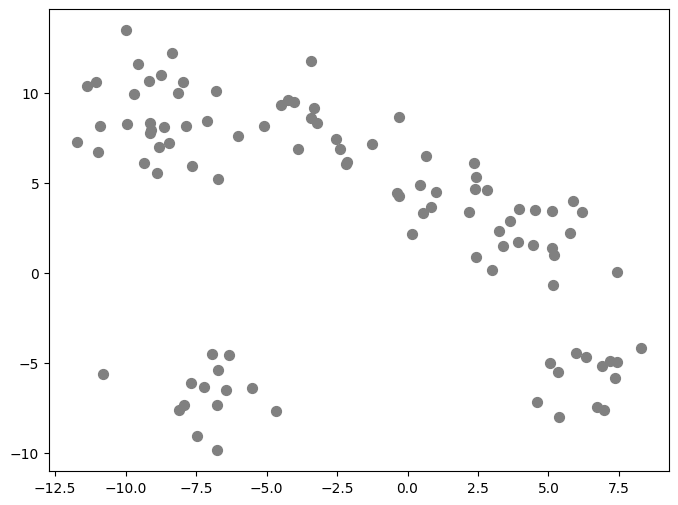

In [3]:
#Clustering with the k-means algorithm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#creating a dataset 
X, y = make_blobs(n_samples=100, centers=7,
                  random_state=42, cluster_std=1.5)
#fit the kmeans
model = KMeans(4, random_state=0)

#predict
y = model.fit_predict(X)

#visual
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

#Estimating clusters with Kernel Density Estimation
Refer Day 18 KDE 

#Clustering with hierarchical and neighborhood algorithms
A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster

1.Identify the 2 clusters which can be closest together, and
2.Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.


Two approcahes of Heirarchial & Neigh Algo:
1.Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
2.Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

#Categorizing data with decision tree and random forest algorithms

refer day 17  from cell 3 - cell 10

Cluster Formation with Other Algorithms	
    Clustering Using Meanshift
	Clustering Using DBSCAN
	Clustering Using Hierarchical Merging

#Clustering Using Meanshift

Mean-shift clustering is a non-parametric, density-based clustering algorithm that can be used to identify clusters in a dataset. It is particularly useful for datasets where the clusters have arbitrary shapes and are not well-separated by linear boundaries.

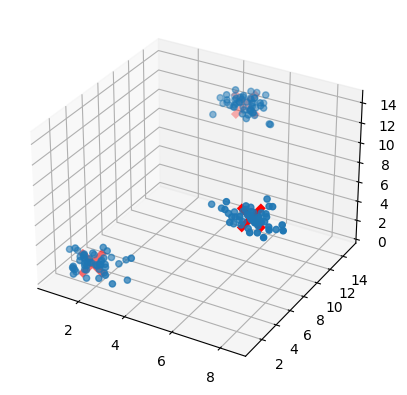

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
clusters = [[2, 2, 2], [7, 7, 7], [5, 13, 13]]
X, _ = make_blobs(n_samples = 150, centers = clusters,
                                   cluster_std = 0.60)
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_
fig = plt.figure()
 
ax = fig.add_subplot(111, projection ='3d')
 
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o')
 
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='x', color ='red',
           s = 300, linewidth = 5, zorder = 10)
 
plt.show()

In [ ]:
#Clustering Using DBSCAN (Density-based spatial clustering of applications with noise (DBSCAN))

Two parameters in DBSCAN:
    
    1.eps : It defines the neighborhood around a data point 
        i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. 
        If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
    2.MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. 
        The minimum value of MinPts must be chosen at least 3.

we have 3 types of data points:
    1.Core Point: A point is a core point if it has more than MinPts points within eps. 
    2.Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
    3.Noise or outlier: A point which is not a core point or border point.
        
        
Algo:
    DBSCAN algorithm can be abstracted in the following steps:

1.Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2.For each core point if it is not already assigned to a cluster, create a new cluster.
3.Find recursively all its density connected points and assign them to the same cluster as the core point. 
4.A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

#Pseudo code of DBSCAN

DBSCAN(dataset, eps, MinPts){
# cluster index
C = 1
for each unvisited point p in dataset {
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C 
}


#Evaluation Metrics

1. Silhouette score 

Silhouette score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.


2.Adjusted rand score

Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery. 

[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2  3  1 -1 -1  3  2  1
  1 -1  3  2 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1  0  1  2  3  0 -1  2 -1  3  0 -1  3  2 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3  1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1  2 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1  2  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0  1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1  2 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2  2 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3  0 -1  0 -1 -1  2 -1  1]
['y', 'b', 'g', 'r']
Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


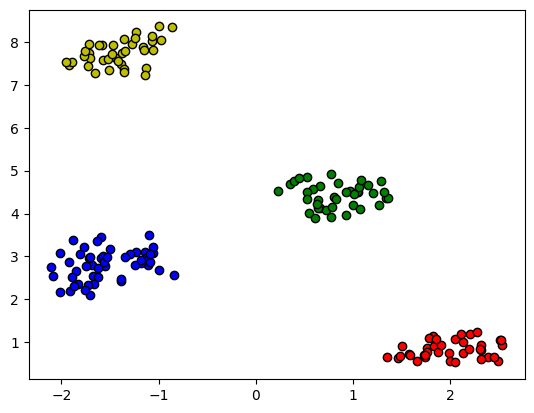

In [12]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)

In [16]:
#Clustering Using Hierarchical Merging

from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)
print(clustering.labels_)
 

[1 1 1 0 0 0]
